<a href="https://colab.research.google.com/github/Nancieskie/Movie-Data-Analysis-Project/blob/master/Personal_expense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install PyPDF2 pdfplumber pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
from faker import Faker

faker = Faker()

# Parameters for simulation
num_records = 100  # Number of transactions

# Simulate M-Pesa-like data
data = {
    "Date": [faker.date_this_year() for _ in range(num_records)],
    "Transaction": random.choices(
        ["Pay Bill", "Buy Goods", "Deposit", "Withdraw", "Airtime"],
        k=num_records
    ),
    "Amount": [random.randint(-5000, 5000) for _ in range(num_records)]
}

# Calculate running balance
data["Balance"] = []
balance = 10000  # Starting balance
for amount in data["Amount"]:
    balance += amount
    data["Balance"].append(max(balance, 0))  # Ensure balance doesn't go negative

# Categorize transactions
def categorize(transaction):
    if transaction == "Pay Bill":
        return "Bills"
    elif transaction == "Buy Goods":
        return "Shopping"
    elif transaction == "Deposit":
        return "Income"
    elif transaction == "Withdraw":
        return "Cash"
    elif transaction == "Airtime":
        return "Communication"
    return "Other"

data["Category"] = [categorize(tx) for tx in data["Transaction"]]

# Create a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")  # Sort by date for easier analysis
print(df.head())


ModuleNotFoundError: No module named 'faker'

In [3]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.6 MB/s eta 0:00:00


In [4]:
from faker import Faker
faker = Faker()
print(faker.name())

Zachary Thomas


In [5]:
import pandas as pd
import random
from faker import Faker

faker = Faker()

# Parameters for simulation
num_records = 100  # Number of transactions

# Simulate M-Pesa-like data
data = {
    "Date": [faker.date_this_year() for _ in range(num_records)],
    "Transaction": random.choices(
        ["Pay Bill", "Buy Goods", "Deposit", "Withdraw", "Airtime"],
        k=num_records
    ),
    "Amount": [random.randint(-5000, 5000) for _ in range(num_records)]
}

# Calculate running balance
data["Balance"] = []
balance = 10000  # Starting balance
for amount in data["Amount"]:
    balance += amount
    data["Balance"].append(max(balance, 0))  # Ensure balance doesn't go negative

# Categorize transactions
def categorize(transaction):
    if transaction == "Pay Bill":
        return "Bills"
    elif transaction == "Buy Goods":
        return "Shopping"
    elif transaction == "Deposit":
        return "Income"
    elif transaction == "Withdraw":
        return "Cash"
    elif transaction == "Airtime":
        return "Communication"
    return "Other"

data["Category"] = [categorize(tx) for tx in data["Transaction"]]

# Create a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")  # Sort by date for easier analysis
print(df.head())


         Date Transaction  Amount  Balance       Category
41 2024-01-12    Pay Bill   -4218     4466          Bills
44 2024-01-14    Pay Bill   -2514      234          Bills
34 2024-01-18     Airtime   -1762     3950  Communication
16 2024-01-24     Deposit   -1910     3038         Income
78 2024-01-25    Pay Bill   -3852        0          Bills


1. Monthly Expense Summary

In [6]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_summary = df[df['Amount'] < 0].groupby('Month')['Amount'].sum()
print(monthly_summary)

Month
2024-01   -19644
2024-02    -7879
2024-03   -10718
2024-04   -10197
2024-05    -5341
2024-06   -16498
2024-07   -16776
2024-08    -5690
2024-09    -3130
2024-10   -21437
2024-11    -7103
2024-12    -3867
Freq: M, Name: Amount, dtype: int64


2. Top Categories

Category
Bills           -25404
Cash            -17651
Shopping         -6236
Communication    13118
Income           14474
Name: Amount, dtype: int64


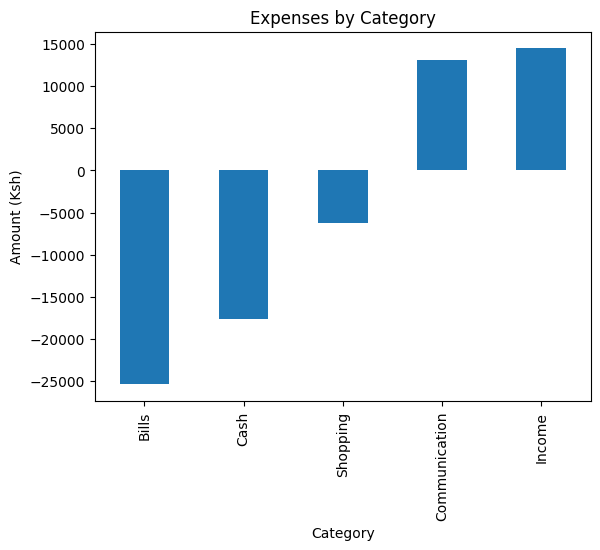

In [7]:
category_summary = df.groupby('Category')['Amount'].sum().sort_values()
print(category_summary)

# Visualize
import matplotlib.pyplot as plt
category_summary.plot(kind='bar')
plt.title('Expenses by Category')
plt.ylabel('Amount (Ksh)')
plt.show()


3. Spending Trends Over Time

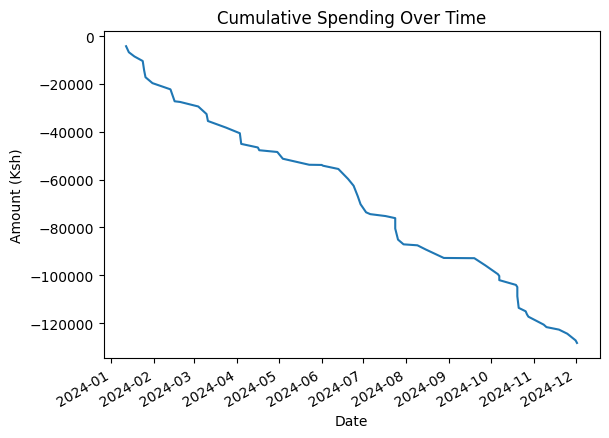

In [8]:
df[df['Amount'] < 0].set_index('Date')['Amount'].cumsum().plot()
plt.title('Cumulative Spending Over Time')
plt.ylabel('Amount (Ksh)')
plt.show()


4. Daily Transaction Count


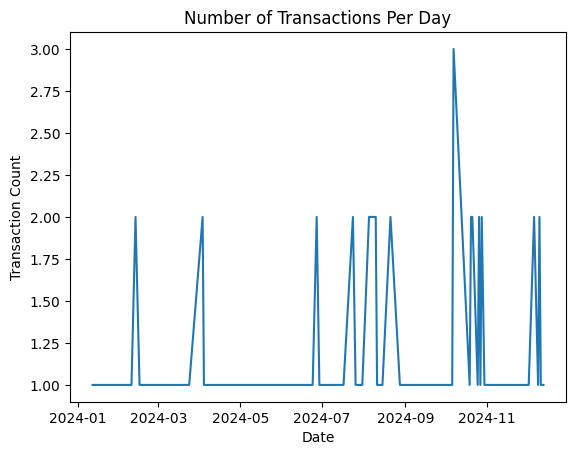

In [9]:
daily_count = df.groupby(df['Date'].dt.date)['Transaction'].count()
daily_count.plot(kind='line')
plt.title('Number of Transactions Per Day')
plt.ylabel('Transaction Count')
plt.show()


In [10]:
df.to_csv('simulated_mpesa_data.csv', index=False)